<h1>Faithfulness metrics</h1>

<h2>Introduction</h2>

<p>This notebook allow to retrieve the faithfulness metrics for compared saliency methods</p>
<p>It requires the installation of requirements.txt and jupyter</p>

<h2>Parameters</h2>

In [96]:
model = 'vgg16'
csv_folder = '../csv'
saliency_dict = { 
    'mycam': 'Our Method',
    # 'gradcam': 'GradCAM',
    # 'gradcampp':'GradCAM++',
    # 'xgradcam':'XGradCAM',  
    # 'scorecam':'ScoreCAM',  
    # 'eigencam':'EigenCAM',
    'fullgrad': 'FullGrad',
    # 'ig': 'IG',
    # 'input': 'Input x Gradient',
    # 'vanilla': 'Vanilla Gradient',
    # 'smooth': 'Smooth Gradient',
}

In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from benchmarks.metrics.insertion import *
from torchvision import transforms
from benchmarks.imagesDataset import ImagesDataset
import plotly.graph_objects as go
from PIL import Image

In [14]:
x = (np.array(range(224))+1)/224

## Average Drop Confidence (%)

## Average Increase Confidence (%)

In [15]:
drop_list = []
increase_list = []
methods = list(saliency_dict.keys())

for saliency in saliency_dict.keys():
    drop = pd.read_csv (csv_folder + "/" + "drop_adi_vgg16_" + saliency + ".csv").to_numpy()
    increase = pd.read_csv (csv_folder + "/" + "increase_adi_vgg16_" + saliency + ".csv").to_numpy()
    drop_list.append(drop[:, 1].mean())
    increase_list.append(increase[:, 1].mean())

In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=methods,
    y=drop_list,
    name='Average Drop Confidence (%)',
    text=[round(i, 2) for i in drop_list],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=methods,
    y=increase_list,
    name='Average Increase Confidence (%)',
    text=[round(i, 2) for i in increase_list],
    textposition='auto'
))
fig.update_layout(
    title='Comparison Of Average Drop Increase Across CAM Methods',
    xaxis_title='CAM Methods',
    yaxis_title='Confidence (%)',
    barmode='group',
    template='plotly_white'
)
fig.show()

<h2>Metrics</h2>

In [17]:
print(model, "faithfulness metrics")
print('____________________________________')
for saliency in saliency_dict.keys():
    del_auc = pd.read_csv (csv_folder + "/" + "del_auc_" + model + "_" + saliency + ".csv").to_numpy()
    ins_auc = pd.read_csv (csv_folder + "/" + "ins_auc_" + model + "_" + saliency + ".csv").to_numpy()
    
    del_details = pd.read_csv (csv_folder + "/" + "del_details_" + model + "_" + saliency + ".csv").to_numpy()
    del_details_float = np.array(del_details[:, 1:], dtype=float)
    mean_del_auc = np.mean(del_auc[:,1])
    
    ins_details = pd.read_csv (csv_folder + "/" + "ins_details_" + model + "_" + saliency + ".csv").to_numpy()
    ins_details_float = np.array(ins_details[:, 1:], dtype=float)
    mean_ins_auc = np.mean(ins_auc[:,1])
    
    try:
        sens = pd.read_csv (csv_folder + "/" + "sens_" + model + "_" + saliency + ".csv").to_numpy()
        mean_sens = np.mean(sens[:,1])
    except:
        mean_sens = 0

    print(saliency_dict[saliency])
    print('Mean Insertion auc:           %0.3f' % mean_ins_auc)
    print('Mean Deletion  auc:           %0.3f' % mean_del_auc)
    print('Mean Insertion-Deletion auc:  %0.3f' % (mean_ins_auc - mean_del_auc))
    print('Mean Insertion-Deletion auc:  %0.3f' % (mean_ins_auc - mean_del_auc))
    print('Mean Sensitivity:             %0.3f' % mean_sens)
    print('____________________________________')



vgg16 faithfulness metrics
____________________________________
GradCAM++
Mean Insertion auc:           0.581
Mean Deletion  auc:           0.217
Mean Insertion-Deletion auc:  0.364
Mean Insertion-Deletion auc:  0.364
Mean Sensitivity:             0.000
____________________________________
Our Method
Mean Insertion auc:           0.513
Mean Deletion  auc:           0.151
Mean Insertion-Deletion auc:  0.361
Mean Insertion-Deletion auc:  0.361
Mean Sensitivity:             0.000
____________________________________
XGradCAM
Mean Insertion auc:           0.609
Mean Deletion  auc:           0.200
Mean Insertion-Deletion auc:  0.409
Mean Insertion-Deletion auc:  0.409
Mean Sensitivity:             0.000
____________________________________
ScoreCAM
Mean Insertion auc:           0.595
Mean Deletion  auc:           0.210
Mean Insertion-Deletion auc:  0.384
Mean Insertion-Deletion auc:  0.384
Mean Sensitivity:             0.000
____________________________________
EigenCAM
Mean Insertion auc: 

vgg16 faithfulness metrics
____________________________________
GradCAM
Mean Insertion auc:           0.620
Mean Deletion  auc:           0.228
Mean Insertion-Deletion auc:  0.392
Mean Insertion-Deletion auc:  0.392
Mean Sensitivity:             0.000
____________________________________
GradCAM++
Mean Insertion auc:           0.600
Mean Deletion  auc:           0.234
Mean Insertion-Deletion auc:  0.366
Mean Insertion-Deletion auc:  0.366
Mean Sensitivity:             0.000
____________________________________
XGradCAM
Mean Insertion auc:           0.628
Mean Deletion  auc:           0.223
Mean Insertion-Deletion auc:  0.404
Mean Insertion-Deletion auc:  0.404
Mean Sensitivity:             0.000
____________________________________
ScoreCAM
Mean Insertion auc:           0.610
Mean Deletion  auc:           0.225
Mean Insertion-Deletion auc:  0.385
Mean Insertion-Deletion auc:  0.385
Mean Sensitivity:             0.000
____________________________________
EigenCAM
Mean Insertion auc:           0.572
Mean Deletion  auc:           0.267
Mean Insertion-Deletion auc:  0.305
Mean Insertion-Deletion auc:  0.305
Mean Sensitivity:             0.000
____________________________________


<h2>Curves</h2>

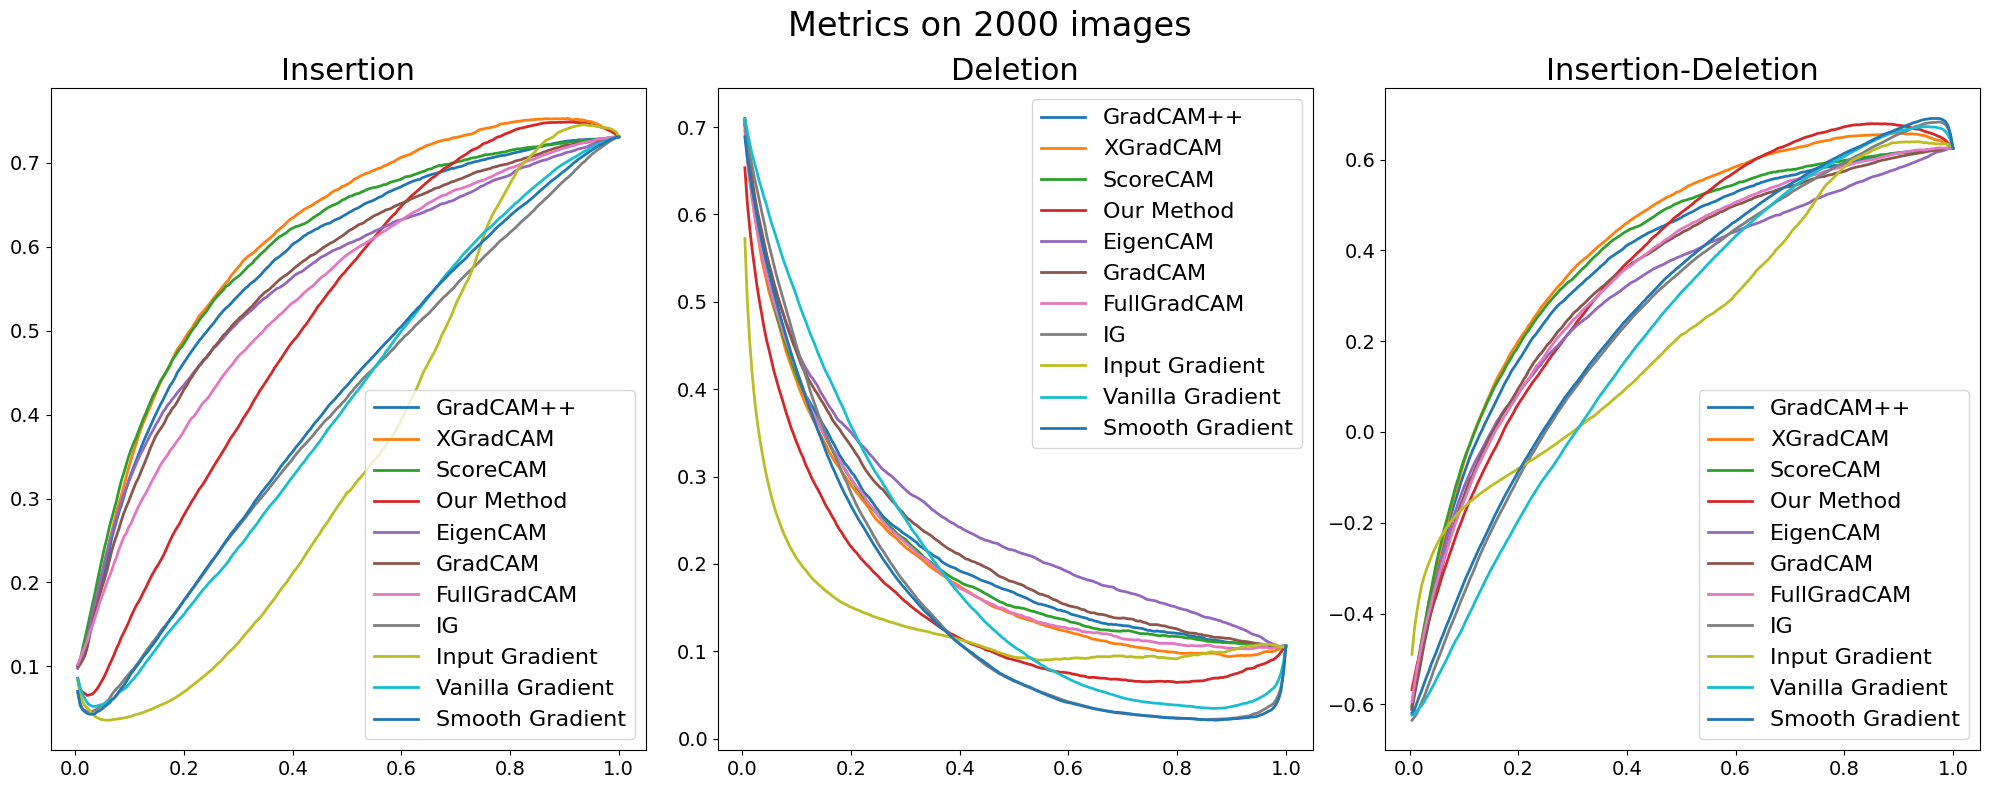

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fontsize = 22
ax[0].set_title("Insertion", fontsize=fontsize)
ax[1].set_title("Deletion", fontsize=fontsize)
ax[2].set_title("Insertion-Deletion", fontsize=fontsize)

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
for idx_saliency, saliency in enumerate(saliency_dict.keys()):
    ins_details = pd.read_csv (csv_folder + "/" + "ins_details_" + model + "_" + saliency + ".csv").to_numpy()
    mean_ins_details = ins_details[:, 1:].mean(0)
    ax[0].plot(x, mean_ins_details, label = saliency_dict[saliency], lw=2)
    del_details = pd.read_csv (csv_folder + "/" + "del_details_" + model + "_" + saliency + ".csv").to_numpy()
    mean_del_details = del_details[:, 1:].mean(0)
    ax[1].plot(x, mean_del_details, label = saliency_dict[saliency], lw=2)
    mean_del_details = del_details[:, 1:].mean(0)
    mean_ins_details = ins_details[:, 1:].mean(0)
    ins_del = mean_ins_details - mean_del_details
    ax[2].plot(x, ins_del, label = saliency_dict[saliency], lw=2)
    for cur_ax in ax:
        cur_ax.legend(prop={'size': 16})

plt.suptitle('Metrics on ' + str(ins_details.shape[0]) + ' images ', fontsize = fontsize*1.1)
plt.tight_layout()
display(fig)
plt.close()

In [97]:
# colors = ['red', 'green', 'royalblue', 'purple', 'orange', 'brown']
colors = ['red', 'royalblue']

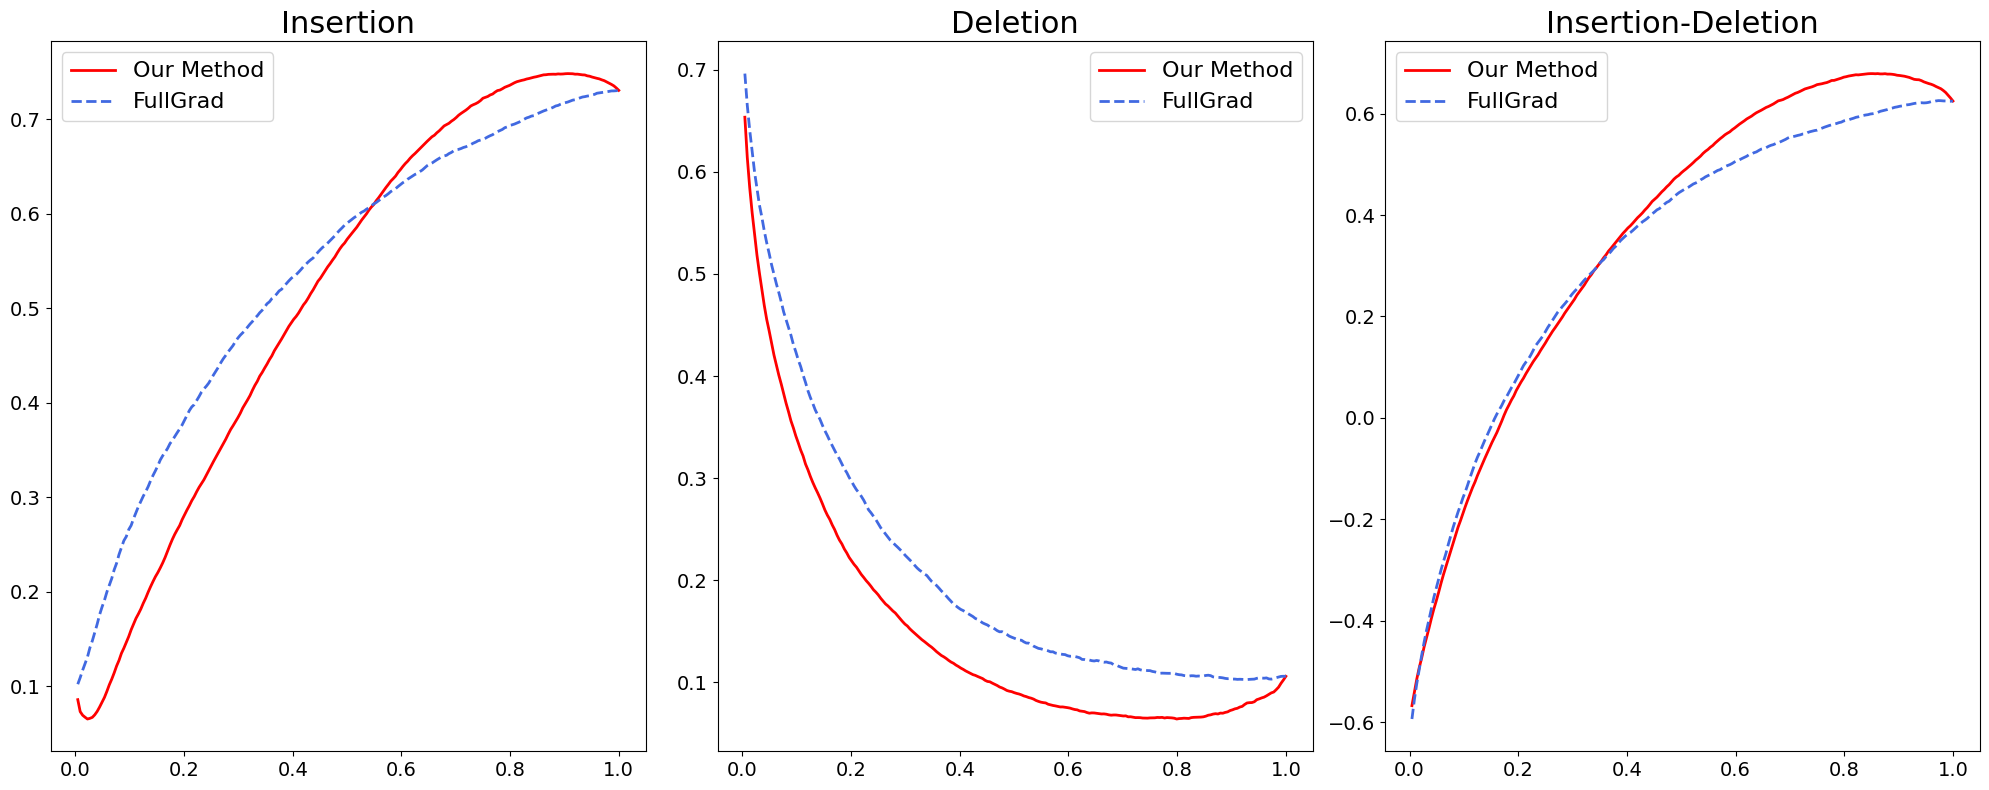

In [98]:
line_styles = {
    # 'gradcampp': '--',
    # 'xgradcam': '--',
    # 'scorecam': '--',
    # 'eigencam': '--',
    # 'gradcam': '--',
    'mycam': '-',  # Dotted line for 'Our Method'
    'fullgrad': '--',
    # 'ig': '--',
    # 'input': '--',
    # 'vanilla': '--',
    # 'smooth': '--'
}

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fontsize = 22
ax[0].set_title("Insertion", fontsize=fontsize)
ax[1].set_title("Deletion", fontsize=fontsize)
ax[2].set_title("Insertion-Deletion", fontsize=fontsize)

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

# Load and plot data
for idx_saliency, saliency in enumerate(saliency_dict.keys()):
    ins_details = pd.read_csv(csv_folder + "/" + "ins_details_" + model + "_" + saliency + ".csv").to_numpy()
    mean_ins_details = ins_details[:, 1:].mean(0)
    ax[0].plot(x, mean_ins_details, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    del_details = pd.read_csv(csv_folder + "/" + "del_details_" + model + "_" + saliency + ".csv").to_numpy()
    mean_del_details = del_details[:, 1:].mean(0)
    ax[1].plot(x, mean_del_details, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    ins_del = mean_ins_details - mean_del_details
    ax[2].plot(x, ins_del, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    for cur_ax in ax:
        cur_ax.legend(prop={'size': 16})

# plt.suptitle('Metrics on average of 2000 images between Our Method and previous methods', fontsize=fontsize*1.1)
plt.tight_layout()
display(fig)
plt.close()

<h2>Specific image curves</h2>

<p>Allow to generate insertion and deletion curves for any individual image.
The number of the image is the index number in the images.txt list, same used in interactive_saliency_visualization.ipynb that can be used simultaly to provide visual feedback on image selection</p>

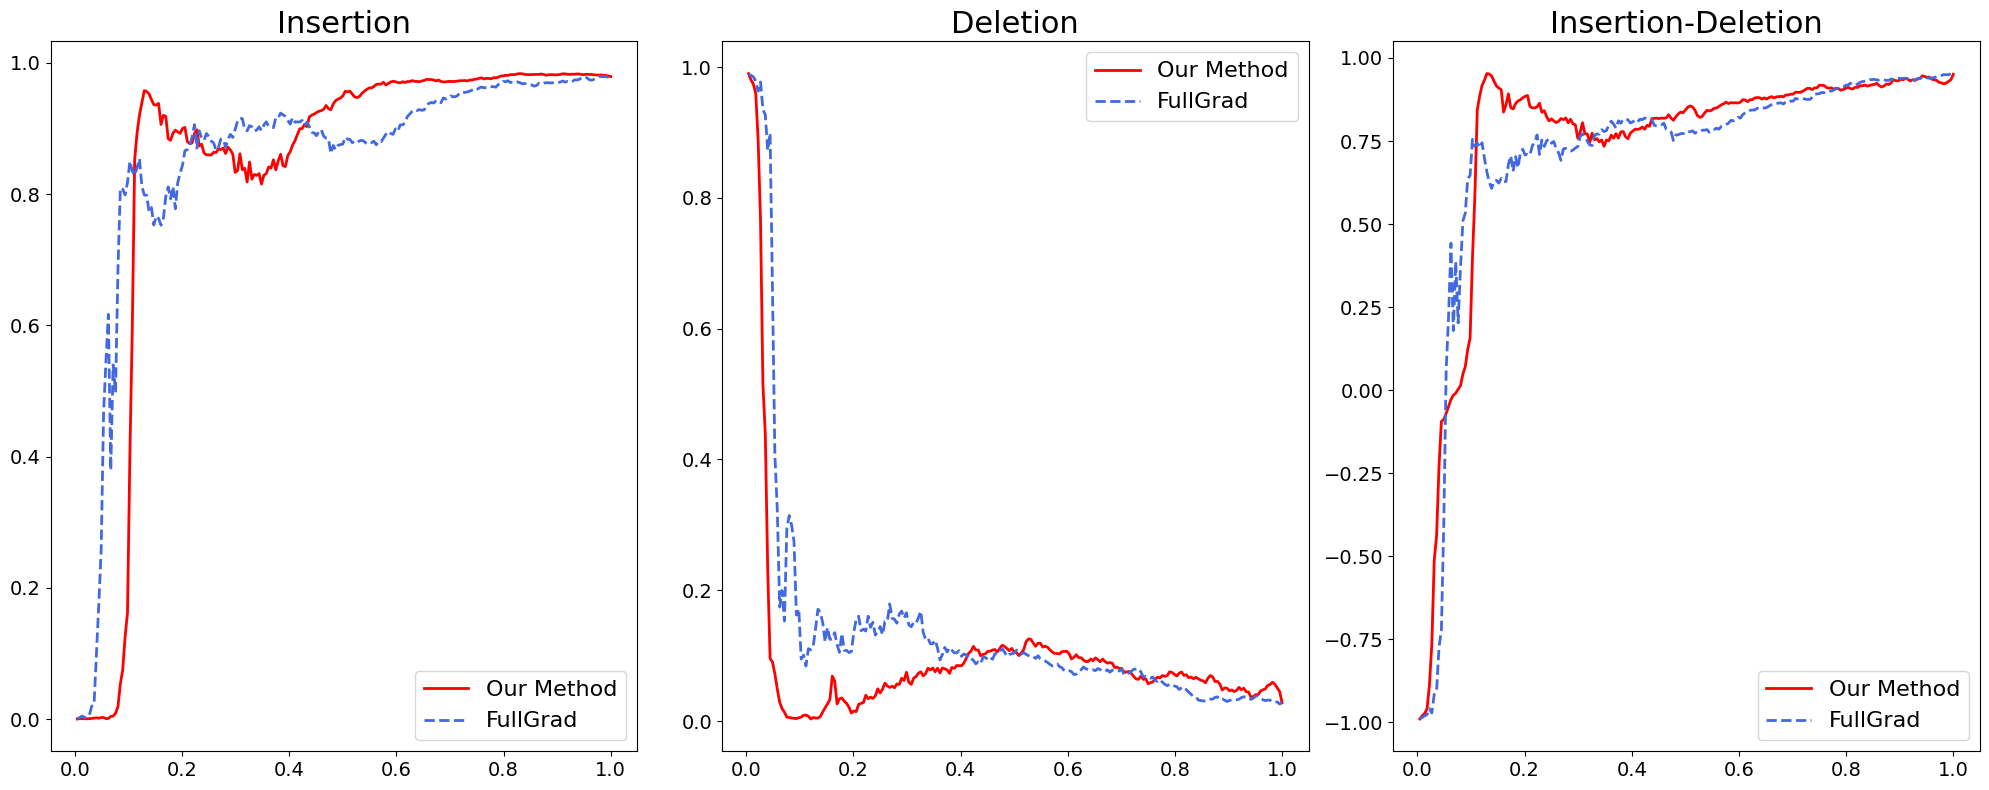

In [99]:
# Select image number here
i = 1000

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fontsize = 22
ax[0].set_title("Insertion", fontsize=fontsize)
ax[1].set_title("Deletion", fontsize=fontsize)
ax[2].set_title("Insertion-Deletion", fontsize=fontsize)

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

# Load and plot data
for idx_saliency, saliency in enumerate(saliency_dict.keys()):
    ins_details = pd.read_csv(csv_folder + "/" + "ins_details_" + model + "_" + saliency + ".csv").to_numpy()
    cur_ins_details = ins_details[i, 1:]
    ax[0].plot(x, cur_ins_details, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    del_details = pd.read_csv(csv_folder + "/" + "del_details_" + model + "_" + saliency + ".csv").to_numpy()
    cur_del_details = del_details[i, 1:]
    ax[1].plot(x, cur_del_details, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    ins_del = cur_ins_details - cur_del_details
    ax[2].plot(x, ins_del, label=saliency_dict[saliency], lw=2, linestyle=line_styles[saliency], color=colors[idx_saliency])

    for cur_ax in ax:
        cur_ax.legend(prop={'size': 16})

# plt.suptitle('Metrics on image id 1000 between Our Method and previous methods', fontsize=fontsize*1.1)
plt.tight_layout()
display(fig)
plt.close()

In [20]:
ins_auc[i]

array(['ILSVRC2012_val_00017104.JPEG', 0.8114177], dtype=object)

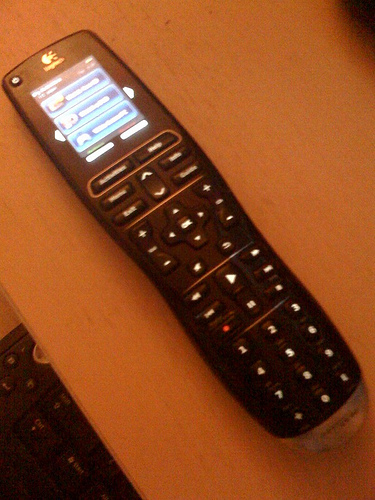

In [21]:
path = "ILSVRC2012_val_00045802.JPEG"
Image.open(f"/Users/trungmai-eh/Developer/CAMProjectXAI/ILSVRC2012_val_folders/{path}")

In [22]:
methods = ['EigenCAM', 'FullGrad', 'GradCAM', 'GradCam++', 'ScoreCAM', 'XGradCAM', 'MyCAM']
values = [106, 553, 395, 110, 7617, 109, 167]

fig = go.Figure(data=[
    go.Bar(name='CAM Methods', x=methods, y=values, text=values, textposition='auto')
])
fig.update_layout(
    title='Comparison of CAM Methods',
    xaxis_title='CAM Methods',
    yaxis_title='Time to complete (seconds)',
    template='plotly_white'
)
fig.show()

In [23]:
methods = ['EigenCAM', 'FullGrad', 'GradCAM', 'GradCam++', 'XGradCAM', 'MyCAM2']
values = [106, 553, 395, 110, 109, 167]

fig = go.Figure(data=[
    go.Bar(name='CAM Methods', x=methods, y=values, text=values, textposition='auto')
])
fig.update_layout(
    title='Comparison of CAM Methods without ScoreCAM',
    xaxis_title='CAM Methods',
    yaxis_title='Values',
    template='plotly_white'
)
fig.show()